### 引入套件與資料匯入

In [1]:
# 引入所需套件
import pandas as pd  
import numpy as np    

In [2]:
# 讀取資料（此資料已有在其他軟體清理過，並非原始資料檔案）
dta = pd.read_csv("/Users/ivy/desktop/dta_new.csv", index_col = 0)
dta.head()

,id,title,type,release_year,age_certification,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,...,romance,family,animation,history,war,scifi,imdb_score_gp,imdb_votes_gp,tmdb_popularity_gp,tmdb_score_gp
1,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,NaN,NaN,0.600,NaN,...,0,0,0,0,0,0,NaN,NaN,0.0,NaN
2,tm84618,Taxi Driver,MOVIE,1976,R,113,8.3,795222.0,27.612,8.2,...,0,0,0,0,0,0,1.0,1.0,1.0,1.0
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,8.2,530877.0,18.216,7.8,...,0,0,0,0,0,0,1.0,1.0,1.0,1.0
4,tm70993,Life of Brian,MOVIE,1979,R,94,8.0,392419.0,17.505,7.8,...,0,0,0,0,0,0,1.0,1.0,1.0,1.0
5,tm190788,The Exorcist,MOVIE,1973,R,133,8.1,391942.0,95.337,7.7,...,0,0,0,0,0,0,1.0,1.0,1.0,1.0


### 資料清洗與準備

In [3]:
# 資料清理
dta = dta.dropna(axis = 0)  #若有遺失值，刪除整筆資料（此做法較為粗糙，一般會視資料欄位特性做處理）
dta = dta.drop(['id', 'title', 'imdb_score', 'imdb_votes_gp', 'tmdb_popularity_gp', 'tmdb_score_gp'], axis = 1)  #刪除不需要的變數

In [4]:
# 將依變數的資料做成一個array(Y)
Y = np.array(dta['imdb_score_gp'])    

# 刪除依變數，將自變數做成新的資料集(features)，並把類別變數變成dummy variable的形式
features = dta.drop('imdb_score_gp', axis = 1)   
features = pd.get_dummies(features)              

# 將features做成list，再把list做成array
features_list = list(features.columns)    
X = np.array(features)                    

### 模型建立

In [5]:
# 引入所需套件
from sklearn.model_selection import train_test_split    
from sklearn.ensemble import RandomForestClassifier     

# 將資料切成70%的training set、30%的testing set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)    

# 以training set建立與配適模型
model = RandomForestClassifier(n_estimators=10)         
model.fit(X_train, Y_train)                             

RandomForestClassifier(n_estimators=10)

In [6]:
# 引入所需套件
from sklearn.metrics import confusion_matrix     

# 以testing set配適模型
predictions = model.predict(X_test)               

# 產生混淆矩陣
conf_mat = confusion_matrix(Y_test, predictions)  
print(conf_mat)                                   

[[255  80]
 [ 91 444]]


### Importance

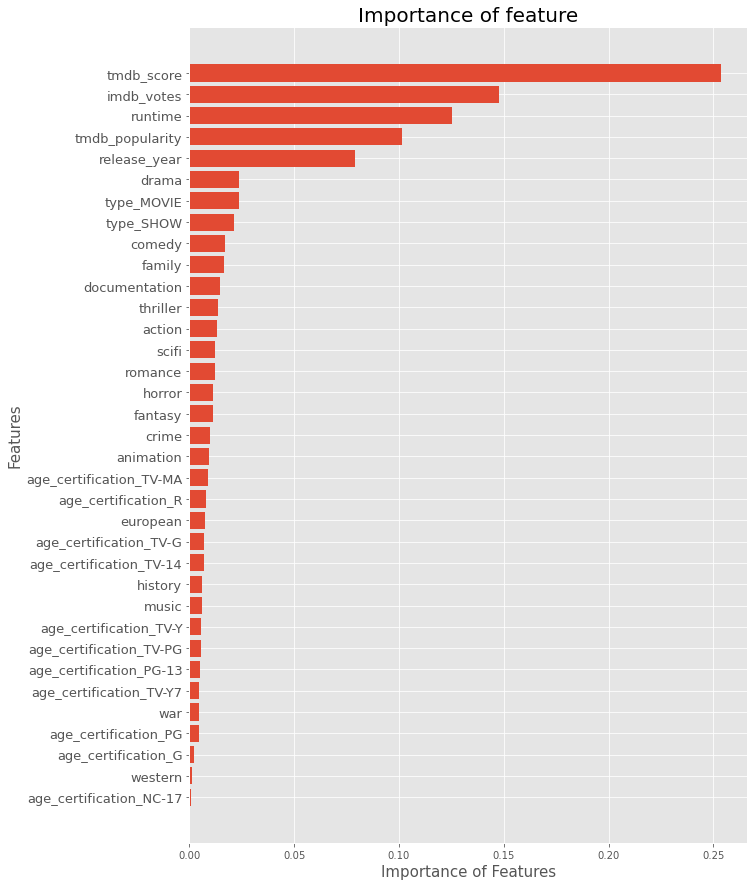

In [7]:
# 計算importance
imp = model.feature_importances_     

# 引入所需套件
import matplotlib.pyplot as plt     

# 將importance與對應的變數名稱鎖在一起
imp, features_list = zip(*sorted(zip(imp, features_list)))    

# 使用ggplot繪圖
plt.style.use('ggplot')              

plt.figure(figsize = (10, 15))       
plt.barh(range(len(features_list)), imp, align = 'center')      

plt.yticks(range(len(features_list)), features_list, fontsize = 13)   
plt.xlabel('Importance of Features', fontsize = 15) 
plt.ylabel('Features', fontsize = 15)                
plt.title('Importance of feature', fontsize = 20)  
   
plt.show()    